# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1225.
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           7.15e-44
Time:                        13:23:54   Log-Likelihood:                 7.7392
No. Observations:                  50   AIC:                            -7.478
Df Residuals:                      46   BIC:                            0.1697
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9670      0.074     67.436      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49019483  4.95510218  5.38266185  5.7469728   6.03148152  6.23170175
  6.35595158  6.42398677  6.46375497  6.50680397  6.58309852  6.71609717
  6.91889813  7.19208726  7.5236418   7.89090569  8.2643119   8.6122402
  8.90621227  9.12557063  9.26087257  9.31544161  9.30482139  9.25422197
  9.1943778   9.15649824  9.16713985  9.24384329  9.39225141  9.60518217
  9.86380858 10.14075198 10.40458024 10.62497198 10.77769828 10.84860345
 10.83593071 10.75061091 10.61446654 10.45662641 10.30873984 10.19977679
 10.15126815 10.1737683  10.26512105 10.41081388 10.58636232 10.76133268
 10.90434222 10.98821524]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.98420217 10.85466287 10.6182351  10.31739195 10.00804297  9.74584554
  9.57257801  9.50591088  9.53508051  9.62352435]


## Plot comparison

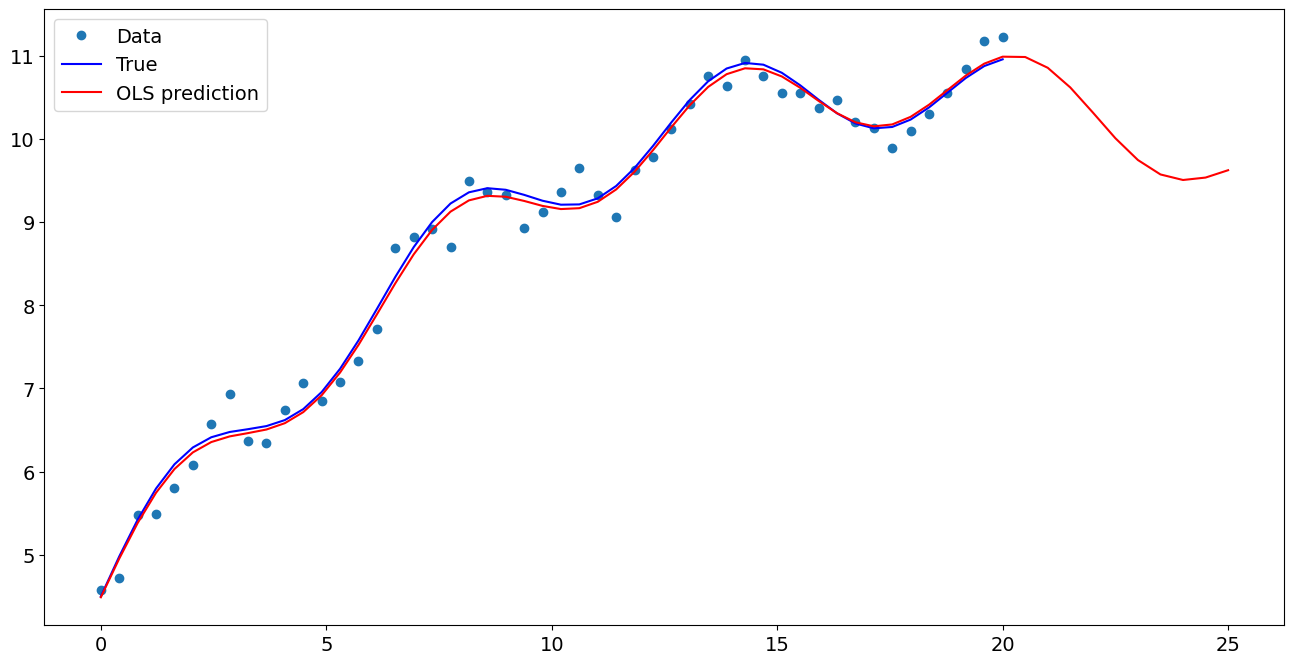

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.966983
x1                  0.493922
np.sin(x1)          0.475256
I((x1 - 5) ** 2)   -0.019072
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.984202
1    10.854663
2    10.618235
3    10.317392
4    10.008043
5     9.745846
6     9.572578
7     9.505911
8     9.535081
9     9.623524
dtype: float64